In [0]:
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
grayImg = cv2.imread('kidney.tif',0)

In [0]:
grayImg.shape

(828, 720)

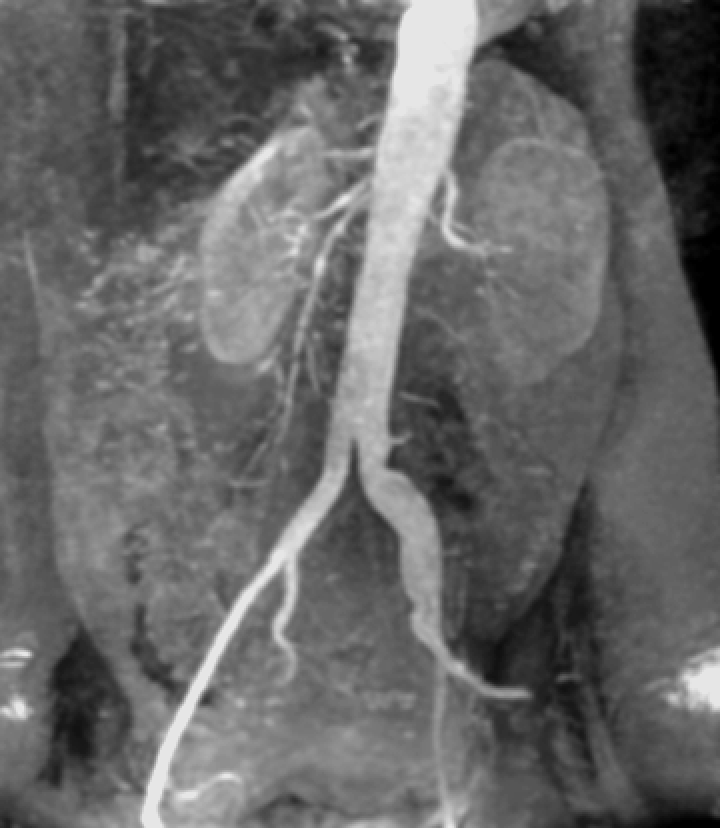

In [0]:
cv2_imshow(grayImg)

In [0]:
#hist = np.zeros((256), dtype='uint32')

In [0]:
def getHistogramArray(grayImg):
  hist = np.zeros((256), dtype='uint32')
  for row in range(grayImg.shape[0]):
    for col in range(grayImg.shape[1]):
      hist[grayImg[row][col]]+=1
  return hist

In [0]:
hist = getHistogramArray(grayImg)

In [0]:
hist

array([ 2252,     0,   756,     0,   920,  1052,     0,     0,  1184,
           0,  1180,     0,  1300,     0,  1284,     0,  1488,     0,
        1504,     0,  1664,     0,     0,  1508,  1700,  1976,     0,
        1828,     0,     0,  2284,     0,  2432,  2184,     0,  2356,
           0,     0,  2528,     0,  2812,  2916,     0,     0,  3104,
           0,  3208,     0,  3496,  3524,     0,  4280,     0,  4412,
           0,  4744,     0,  5100,     0,  5232,     0,  5608,     0,
        5792,     0,     0,  6012,     0,  6444,  6940,     0,  7508,
           0,  7572,     0,  8292,     0,  8540,  8520,     0,     0,
        9252,     0, 10072,     0, 12112, 15032,     0,     0, 17032,
           0, 17092,     0, 17904,     0, 18240, 18624,     0, 17340,
           0, 15708,     0,     0, 15260, 14348,     0, 13172,     0,
       12588,     0,     0, 11980,     0, 11636, 11556,     0,     0,
       11280,     0, 10748, 10232,     0,  9616,     0,  8756,     0,
        7852,     0,

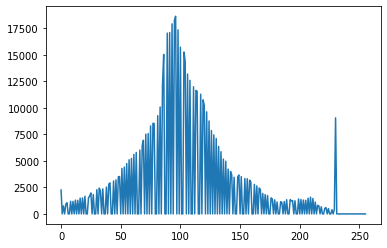

In [0]:
plt.plot(hist)
plt.show()

In [0]:
mask = np.zeros(grayImg.shape,dtype=int)

In [0]:
mask.shape

(828, 720)

In [0]:
for row in range(grayImg.shape[0]):
  for col in range(grayImg.shape[1]):
      if(grayImg[row,col]>150 and grayImg[row,col]<235):
        mask[row][col]=255
      else:
        mask[row][col]=0



In [0]:
mask.shape

(828, 720)

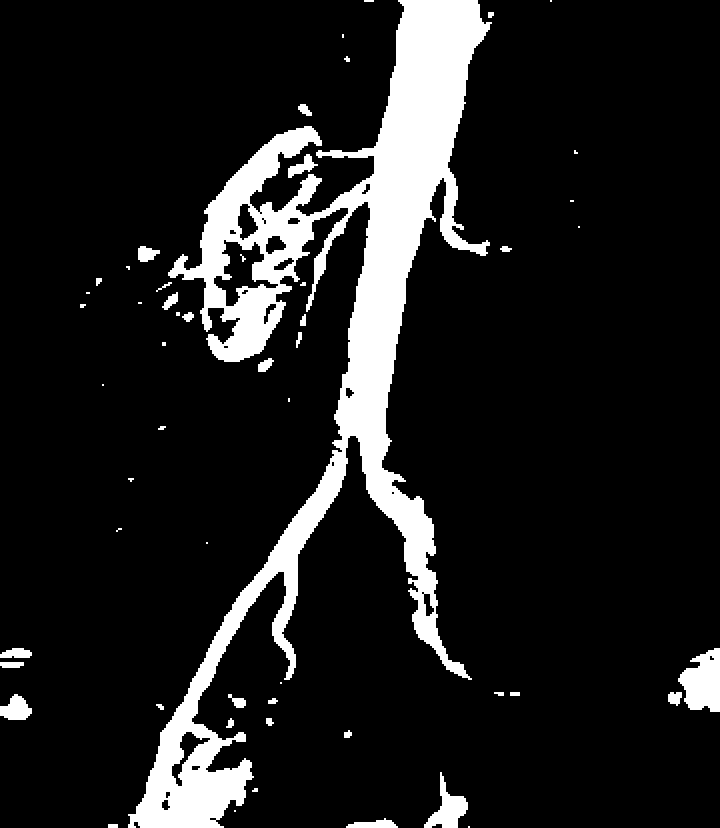

In [0]:
cv2_imshow(mask)

In [0]:
resImg=np.bitwise_or(mask,grayImg)

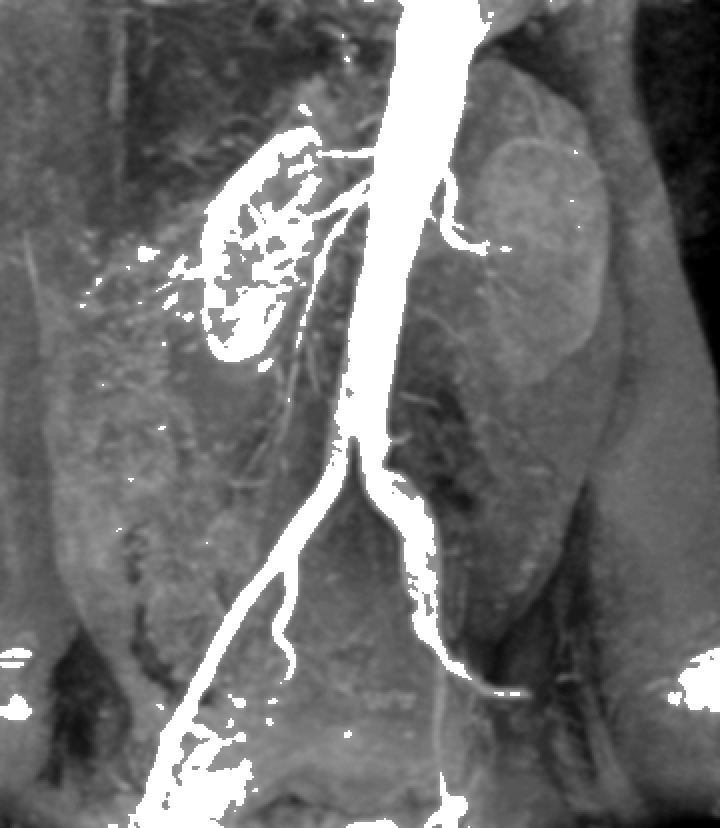

In [0]:

cv2_imshow(resImg) 

In [0]:
# ---------------------------- Task 2 -------------------------------------------------------


In [0]:
def getRmax(hist):
  for i in range(hist.size-1, 0, -1):
    if hist[i]!=0:
      Rmax=i
      break;
  return Rmax

In [0]:
def getRmin(hist):
  for i in range(hist.size):
    if hist[i]!=0:
      Rmin=i
      break;
  return Rmin;


In [0]:
def getContrastStretch(imgPath,Smin, Smax):
  img2=cv2.imread(imgPath,0)
  hist2=getHistogramArray(img2)
  Rmin=getRmin(hist2)
  Rmax=getRmax(hist2)
  finalImg2 = np.zeros(img2.shape)
  finalHist2 =  np.zeros(hist2.size)
  for R in range(Rmin, Rmax):
    S=math.ceil((Smax-Smin)/(Rmax-Rmin)*(R-Rmin)+Smin)
    finalHist2[S]= hist[R]
    for row in range(img2.shape[0]):
      for col in range(img2.shape[1]):
        if (img2[row,col]==R):
          finalImg2[row,col]=S;
  return finalHist2 , finalImg2

In [0]:
finalHist2, finalImg2 = getContrastStretch('lowcon.tif', 0, 255)

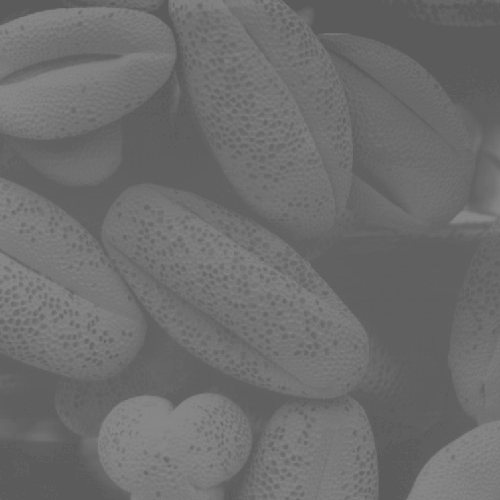

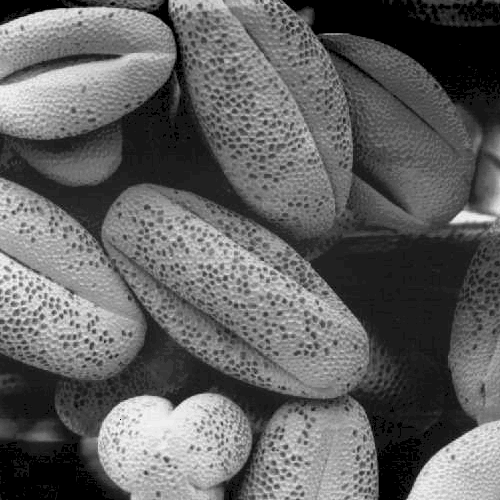

In [0]:
img2=cv2.imread('lowcon.tif',0)
cv2_imshow(img2)
cv2_imshow(finalImg2)

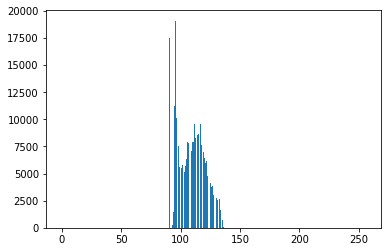

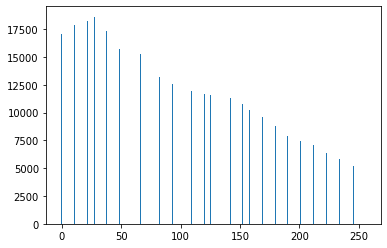

In [0]:
hist2=getHistogramArray(img2)
plt.bar([i for i in range(256)],hist2)
plt.show()
plt.bar([i for i in range(256)],finalHist2)
plt.show()
